In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_wine

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

* We have loaded the necessary libraries above
* Now let's load the data

In [2]:
data = load_wine(as_frame=True)
df = data.data.copy()  # features
# Look at the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)
# and save the label in a column called 'y' in df.
df['y'] = data.target.copy() ## YOUR CODE HERE # label
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
#How many samples and features are there?

a = len(df)
b = len(df.columns) - 1
print('number of samples:', a, 'number of features:', b)

number of samples: 178 number of features: 13


In [4]:
# Quiz Q1
# How many instances are there for each class? 
df['y'].value_counts()
# YOUR CODE HERE


1    71
0    59
2    48
Name: y, dtype: int64

In [5]:
# Calculate the means, medians, and standard deviations of each feature
df.describe()
#YOUR CODE HERE

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


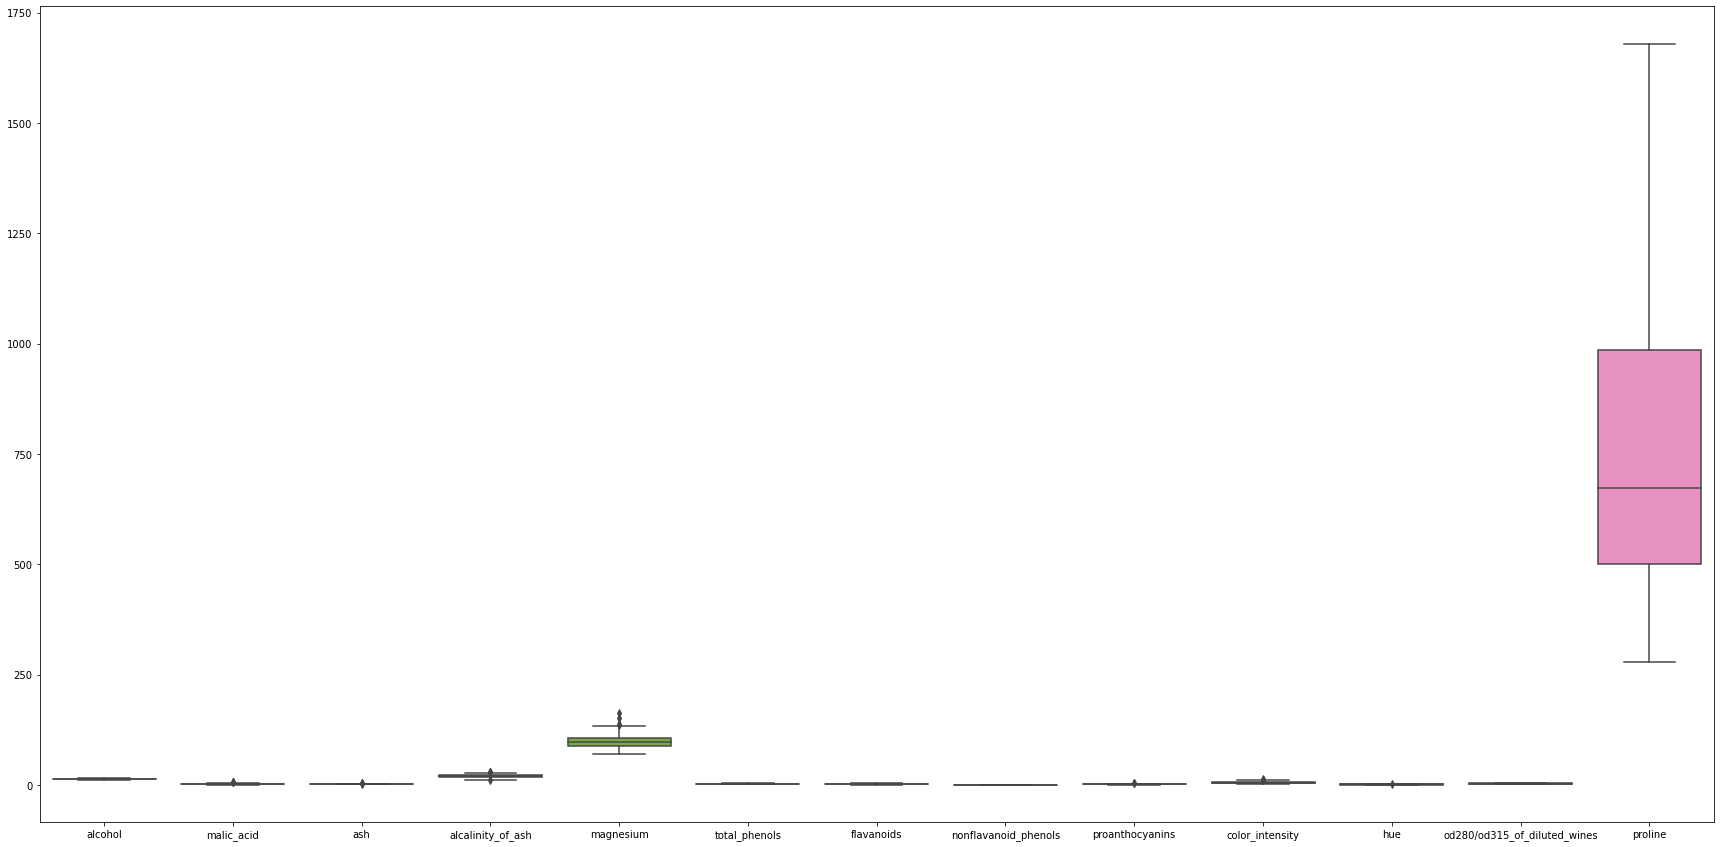

In [6]:
# Plot a boxplot of each feature (NOT THE LABEL!!) (all in one plot -- you can do this with a single line of code).
# Quiz Q2: Is there any feature that is in a clearly different scale than the others?
plt.figure(figsize=(30,15))
_ = sns.boxplot(data = df.iloc[:, : -1])

array([[<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'malic_acid'}>,
        <AxesSubplot:title={'center':'ash'}>,
        <AxesSubplot:title={'center':'alcalinity_of_ash'}>],
       [<AxesSubplot:title={'center':'magnesium'}>,
        <AxesSubplot:title={'center':'total_phenols'}>,
        <AxesSubplot:title={'center':'flavanoids'}>,
        <AxesSubplot:title={'center':'nonflavanoid_phenols'}>],
       [<AxesSubplot:title={'center':'proanthocyanins'}>,
        <AxesSubplot:title={'center':'color_intensity'}>,
        <AxesSubplot:title={'center':'hue'}>,
        <AxesSubplot:title={'center':'od280/od315_of_diluted_wines'}>],
       [<AxesSubplot:title={'center':'proline'}>,
        <AxesSubplot:title={'center':'y'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

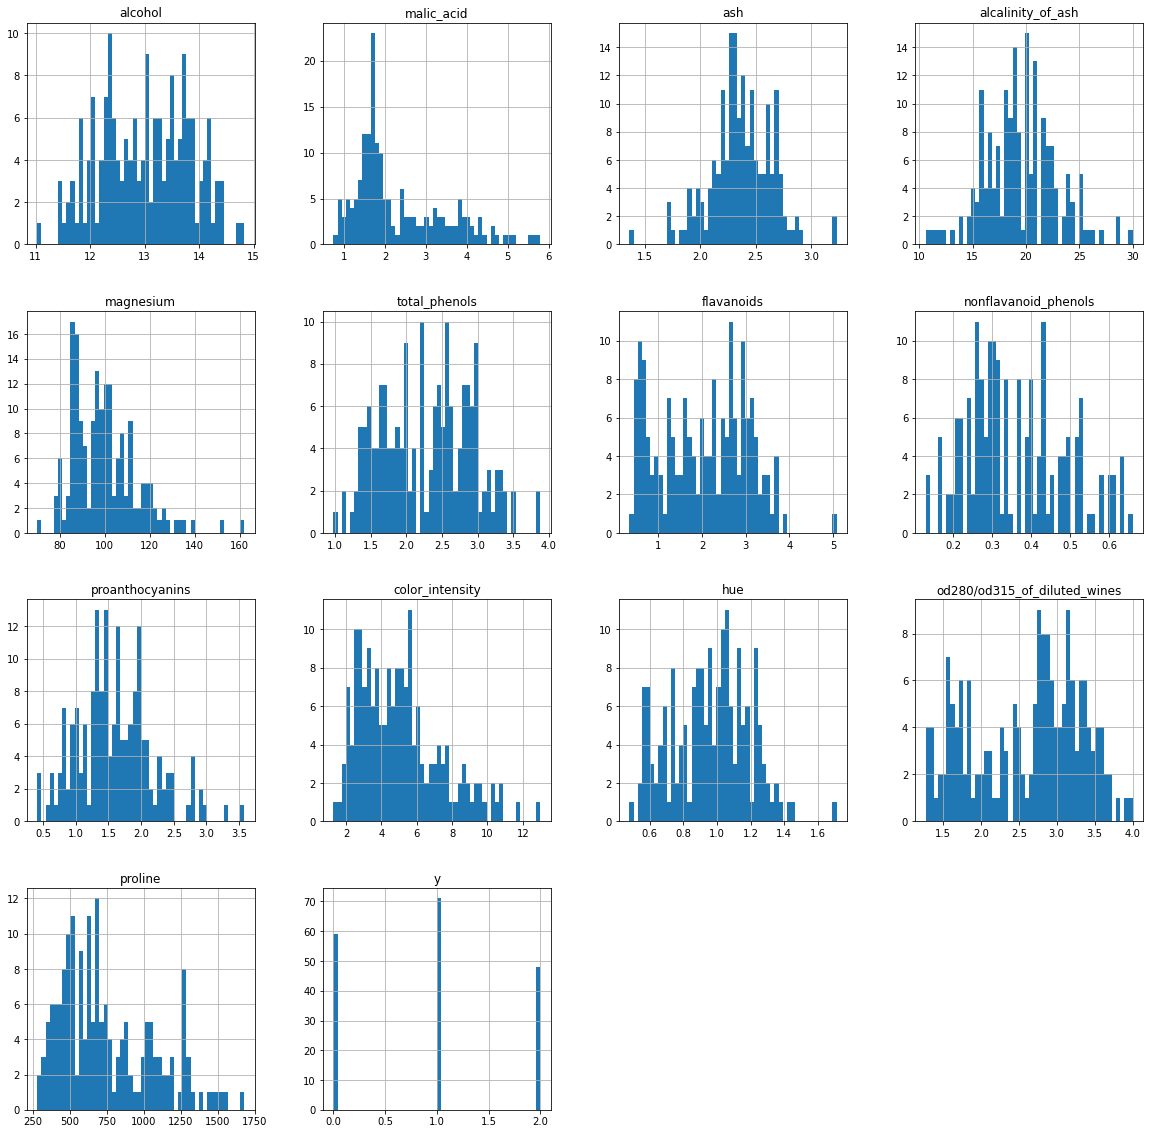

In [7]:
# Let's look at the distributions of values of our features. Draw a histogram for each of the features
df.hist(bins=50, figsize=(20,20))
# YOUR CODE HERE

Let's do some multivariate analysis

<AxesSubplot:>

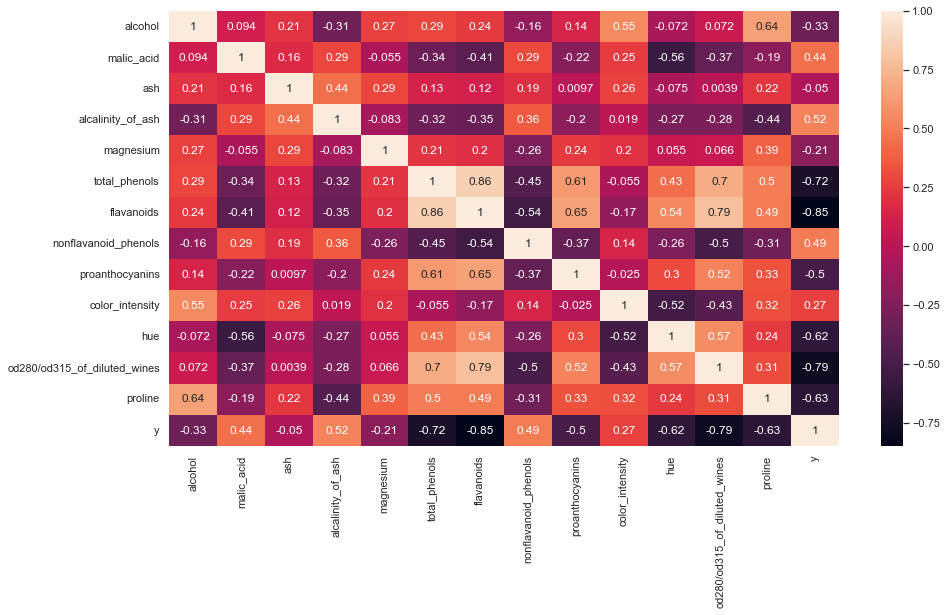

In [8]:
# Calculate the correlations between each pair of variables

# YOUR CODE HERE
cor = df.corr()
# Plot a heatmap of the correlations between pairs of FEATURES (i.e., don't include the target!)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cor, annot = True)
# YOUR CODE HERE

In [10]:
# What is the highest correlation between features?
# The highest correlation between features is 0.86

You should have noticed that some of the features are highly correlated. 

For this reason, we can run into trouble when trying to train a classifier due to multicolinearity.

Let's do PCA on this dataset to remove these correlations

In [17]:
# Let's do PCA:
# HINT: I suggest you attempt Q5 of the quiz and then use the function you developed
#       in this and some of the following cells.

# 1. Standardise your data using a StandardScaler. Make sure you're not scaling the 'y'!
scale= StandardScaler()
scaled= scale.fit_transform(df) 

# 2. Do PCA with 2 components. How much variance is retained from the original dataset?

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled)
principalDf = pd.DataFrame(data = principalComponents)
principalDf


,0,1
0,-3.522934,-1.453098
1,-2.528858,0.330019
2,-2.785029,-1.036936
3,-3.922588,-2.768210
4,-1.407511,-0.867773
...,...,...
173,3.627996,-2.206617
174,2.942729,-1.752263
175,3.027272,-2.756040
176,2.755222,-2.293784


In [18]:
pca = PCA(n_components=0.85)
principalComponents = pca.fit_transform(scaled)
principalDf1 = pd.DataFrame(data = principalComponents)
principalDf1

,0,1,2,3,4,5
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762
...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,-1.143155
174,2.942729,-1.752263,0.207480,0.399381,0.154223,-0.062465
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,0.005290
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,1.012562


In [20]:
print(pca.explained_variance_ratio_)

[0.39542486 0.17836259 0.10329102 0.06627984 0.06267875 0.0480556 ]


(178, 14)

In [21]:
df.shape

(178, 14)

In [24]:
label = df['y']
label

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: y, Length: 178, dtype: int32

In [25]:
label.shape

(178,)

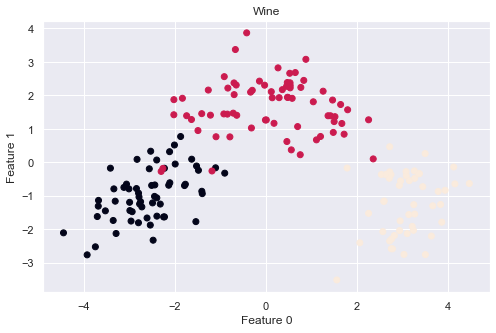

In [26]:
# Plot your two components, using the label from the data to colour the points
plt.figure(figsize=(8,5))
plt.title('Wine', fontsize=12)
#plt.grid(True)
plt.scatter(principalDf[0], principalDf[1], c=label)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.savefig('moons_scatter_colour.pdf', dpi=300)
plt.show()

# YOUR CODE HERE


In [27]:
# How many components do you need to keep at least 85% of the variance in the dataset? (Q6)
pca_85 = PCA(n_components=0.85)
principalComponents = pca_85.fit_transform(scaled)
principalDf1 = pd.DataFrame(data = principalComponents)
principalDf1
# YOUR CODE HERE


,0,1,2,3,4,5
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762
...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,-1.143155
174,2.942729,-1.752263,0.207480,0.399381,0.154223,-0.062465
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,0.005290
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,1.012562


In [29]:
# How much variance is retained if we do PCA with 3 components? (Q7)
pca3 = PCA(n_components=3)
principalComponents = pca3.fit_transform(scaled)
principalDf2 = pd.DataFrame(data = principalComponents)

print(pca3.explained_variance_ratio_)

# YOUR CODE HERE


[0.39542486 0.17836259 0.10329102]


## Clustering

Let's see how many clusters does K-Means find.



C:\Users\Kakoli Banik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


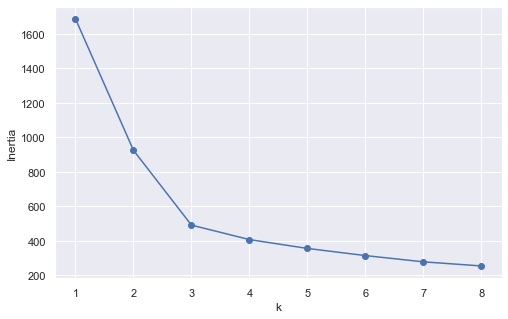

In [31]:
# Use the elbow method to select the number of clusters in your data using 3 PCs.
inertias = []
for k in range(1, 9):
  kmeans = KMeans(n_clusters=k)
  y_pred = kmeans.fit_predict(principalDf2)
  inertias.append(kmeans.inertia_)
# Let's plot inertia vs number of clusters
plt.figure(figsize=(8,5))
plt.plot(range(1, 9), inertias, 'o-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()
# YOUR CODE HERE


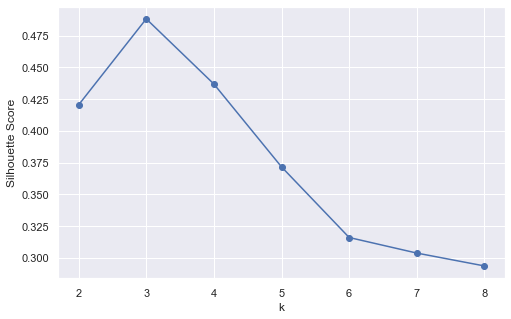

In [32]:
# Now use the silhouette score to choose between the two candidate k values from the previous cell
sil = []
for k in range(2, 9):
  kmeans = KMeans(n_clusters=k)
  y_pred = kmeans.fit_predict(principalDf2)
  sil.append(silhouette_score(principalDf2, y_pred))
# Let's plot SIL vs number of clusters
plt.figure(figsize=(8,5))
plt.plot(range(2, 9), sil, 'o-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()
# YOUR CODE HERE


3


Text(0, 0.5, 'PC 1')

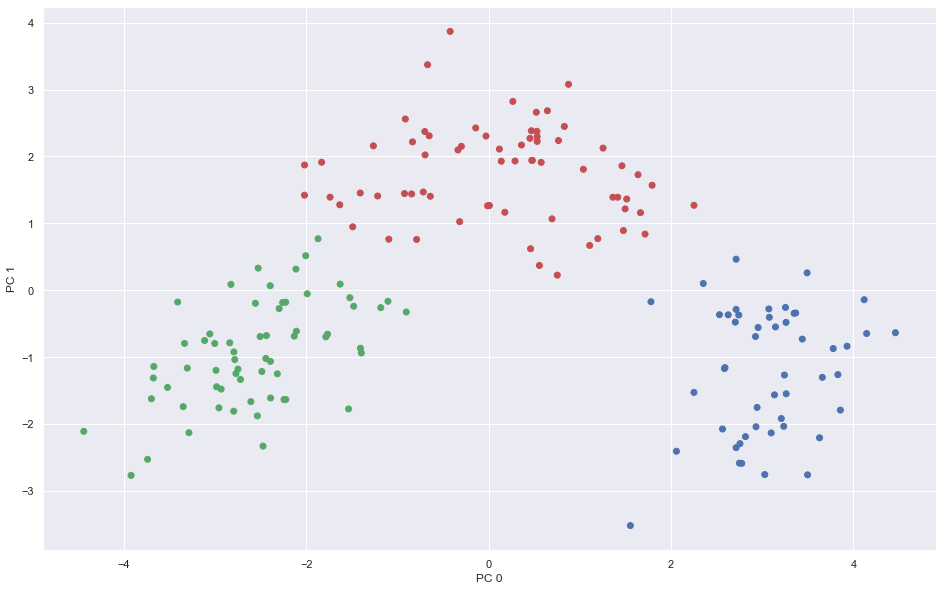

In [33]:
# Visualise the first two pcs (using a scatterplot) using the labels from KMeans with your chosen value of k
clusterer = KMeans(n_clusters=3)
clusterer.fit(principalComponents)
print(len(set(clusterer.labels_)))  # how many clusters did it find?
labels_rgb = ['r' if l==0 else 'g' if l==1 else 'b' for l in clusterer.labels_]
# And plot them
plt.figure(figsize=(16,10))
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=labels_rgb)
plt.xlabel('PC 0')
plt.ylabel('PC 1')
# YOUR CODE HERE


Now we can try to understand our clusters.

In [34]:
# In the original (before PCA and before standardisation) dataframe, add a column called 'cluster' that contains
# the cluster assignment from above
df['cluster'] = clusterer.labels_

# YOUR CODE HERE


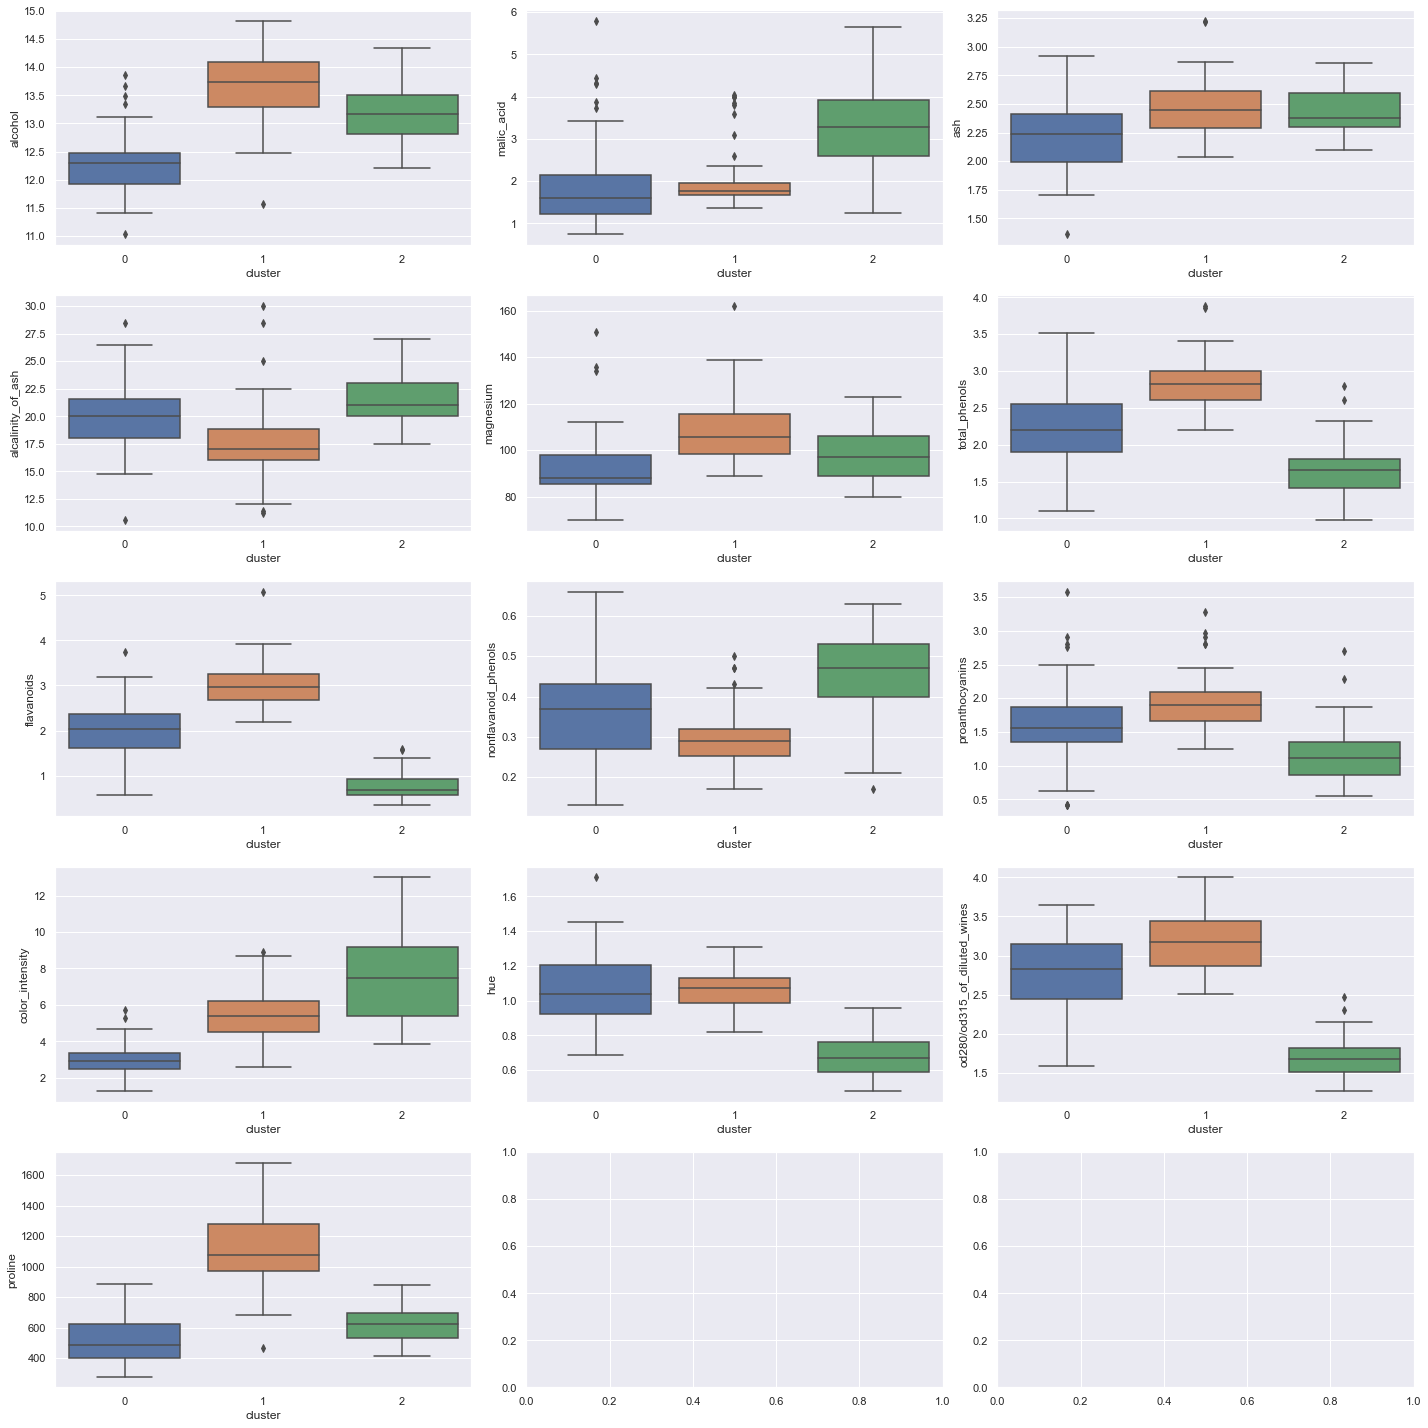

In [35]:
# Do a boxplot of each feature, separating between clusters
rows, cols = 5, 3
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (20,20))
idx = 0
for i in range(rows):
  for j in range(cols):
    sns.boxplot( x= 'cluster', y = df[df.columns[idx]], data =df, ax=ax[i][j])
    idx +=1
    if idx > len (df.columns) - 3:
      break
    
plt.tight_layout()

# YOUR CODE HERE


Write your observations here.
For example: is there a clear difference between the clusters in terms of alcohol content? What about flavanoids?

In [ ]:
# Feel free to keep playing with the data here!